# Contents
**1. Data Exploration**

**2. Data Visualisation**

**3. Modelling Factors Affecting Adoption Speed**

**4. Prediction**

**5. Future Analysis Extension**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the relevant data
airlines = pd.read_csv('.../airlines.csv')
airports = pd.read_csv('.../airports.csv')
flights = pd.read_csv('.../flights.csv')
weather = pd.read_csv('.../weather.csv')

# 1. Data Exploration

### Original Data

In [3]:
airlines
#The data contains flights of 16 different carriers

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [4]:
airports
#Flights take off or land at 1458 different airports

,faa,name
0,04G,Lansdowne Airport
1,06A,Moton Field Municipal Airport
2,06C,Schaumburg Regional
3,06N,Randall Airport
4,09J,Jekyll Island Airport
...,...,...
1453,ZUN,Black Rock
1454,ZVE,New Haven Rail Station
1455,ZWI,Wilmington Amtrak Station
1456,ZWU,Washington Union Station


In [5]:
flights.head()
#Shows the first 5 flights in the data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [6]:
weather.head()
#Shows the first 5 weather records

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,precip,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,0.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,0.0,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,0.0,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,0.0,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,0.0,10.0,2013-01-01T10:00:00Z


### Creating a Complete Dataframe

In [7]:
#Merges 'airlines' to 'flights' on 'carrier' to create a new, central dataframe 'data'
data = pd.merge(flights,airlines, on=['carrier'])

#Merges 'weather' to 'data' on 'year', 'month', 'day','hour', 'origin', and 'time_hour'
data = pd.merge(data,weather,on=['year','month','day','hour','origin','time_hour'])

#### Investigating the New Data

In [8]:
data.describe()

#Using the describe() method gives us a high level snapshot of what the data looks like.
#It is useful for assessing the spread of the data, along with helping us to spot outliers by
#looking at the max and min values, for example. From the below table, although there are some
#extreme values (e.g. 1301 max dep_delay = approx. 22 hr delay), these are sensible given the 
#context.

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,precip,visib
count,334504.0,334504.000000,334504.000000,326277.000000,334504.000000,326277.000000,325819.000000,334504.000000,325819.000000,334504.000000,...,334504.000000,334504.000000,334504.000000,334487.000000,334487.000000,334487.000000,326284.000000,334426.000000,334504.000000,334504.000000
mean,2013.0,6.531222,15.670799,1348.449079,1343.547620,12.614827,1501.811481,1535.996565,6.882788,1972.324836,...,1039.205986,13.173295,26.218081,56.988861,41.621846,59.552967,201.563117,11.114270,0.004553,9.256232
std,0.0,3.407633,8.742934,487.934433,467.034132,40.205979,532.175441,496.889093,44.662014,1632.724276,...,733.092556,4.658356,19.300181,17.962154,19.351869,19.655480,104.823918,5.575087,0.030933,2.027874
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,...,17.000000,1.000000,0.000000,10.940000,-9.940000,12.740000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,...,502.000000,9.000000,8.000000,42.080000,26.060000,43.990000,130.000000,6.904680,0.000000,10.000000
50%,2013.0,7.000000,16.000000,1400.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,...,872.000000,13.000000,29.000000,57.200000,42.800000,57.730000,220.000000,10.357020,0.000000,10.000000
75%,2013.0,9.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3466.000000,...,1389.000000,17.000000,44.000000,71.960000,57.920000,75.330000,290.000000,14.960140,0.000000,10.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,...,4983.000000,23.000000,59.000000,100.040000,78.080000,100.000000,360.000000,42.578860,1.210000,10.000000


In [9]:
data.shape
#The data contains 334,504 observations/rows, in this case flights, and 26 columns

(334504, 26)

In [10]:
# Missing data can often invalidate our analysis or make it more difficult, so
#it is important to know how significant its presence in the data is

print("Number of missing values in each column before cleaning:")
print(data.isnull().sum()) #Shows the total number of missing values in each column
print("\n")

missing_values = sum(data.isnull().sum())
total_values = np.product(data.shape)
missing_proportion = (missing_values/total_values) * 100
print("Proportion of missing values in the data before cleaning: " + 
      "{:.2f}".format(missing_proportion) + "% (2dp)")

# Before cleaning the data, the number of missing values as a proportion of 
#the whole dataset is only 0.58%. We can therefore remove these datapoints
#without significantly impacting the integrity of our data.

Number of missing values in each column before cleaning:
year                 0
month                0
day                  0
dep_time          8227
sched_dep_time       0
dep_delay         8227
arr_time          8685
sched_arr_time       0
arr_delay         8685
carrier              0
flight               0
origin               0
dest                 0
air_time          8685
distance             0
hour                 0
minute               0
time_hour            0
name                 0
temp                17
dewp                17
humid               17
wind_dir          8220
wind_speed          78
precip               0
visib                0
dtype: int64


Proportion of missing values in the data before cleaning: 0.58% (2dp)


In [11]:
data = data.dropna()
#Dropping the missing values

### **Feature Addition/Manipulation**

In [12]:
#Changing the 'hour' column names#
#To make it clear that the 'hour' column corresponds to the departure hour (and not the arrival hour)
data[['dep_time','hour']]
data = data.rename(columns={"hour": "dep_hour"})

#I also convert the column to be categorical
data['dep_hour'] = np.where(data['dep_hour'] >= 12, 1, 0)
#Flights departing in the AM = 0, Flights departing in the PM = 1

In [13]:
#Comparing arr_delay > 15 min vs dep_delay > 15 min#
print("No. of arrival delays > 15 min: " + str(data[data['arr_delay']>15].shape[0]))
print("No. of departure delays > 15 min: " + str(data[data['dep_delay']>15].shape[0]))

No. of arrival delays > 15 min: 75245
No. of departure delays > 15 min: 68196


In [14]:
#Creating the 'delayed' column
data['delayed'] = np.where(data['arr_delay'] > 15,1,0)
# = 1 if arrival delay is more than 15 min, = 0 otherwise

### Checking Final Data Form

In [15]:
print("Number of missing values in each column before cleaning:")
print(data.isnull().sum())
print("\n")

missing_values = sum(data.isnull().sum())
total_values = np.product(data.shape)
missing_proportion = (missing_values/total_values) * 100
print("Proportion of missing values in the data after cleaning: " + 
      "{:.2f}".format(missing_proportion) + "% (2dp)")

#We have removed all missing data

Number of missing values in each column before cleaning:
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
air_time          0
distance          0
dep_hour          0
minute            0
time_hour         0
name              0
temp              0
dewp              0
humid             0
wind_dir          0
wind_speed        0
precip            0
visib             0
delayed           0
dtype: int64


Proportion of missing values in the data after cleaning: 0.00% (2dp)


In [16]:
#Cleaned dataframe columns
data.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'dep_hour', 'minute',
       'time_hour', 'name', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'precip', 'visib', 'delayed'],
      dtype='object')

In [17]:
data.shape
#The cleaned dataframe contains 317,755 observations and 27 columns

(317755, 27)

# 2. Data Visualisation

Here I visualise a select group of key features ('dep_hour', 'visib', 'month', 'temp', 'minute', 'carrier', 'wind_speed'), in the context of the newly created delayed

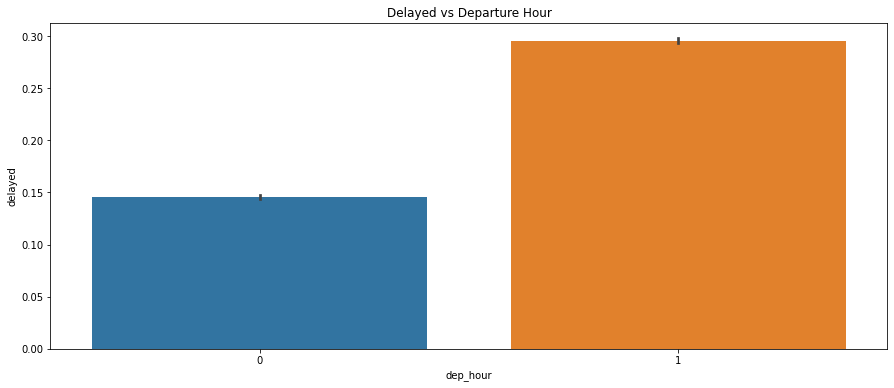

In [18]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Departure Hour")
sns.barplot(data['dep_hour'],data['delayed'])
plt.show()

#Flights that depart after 12pm are delayed at a greater rate, on average

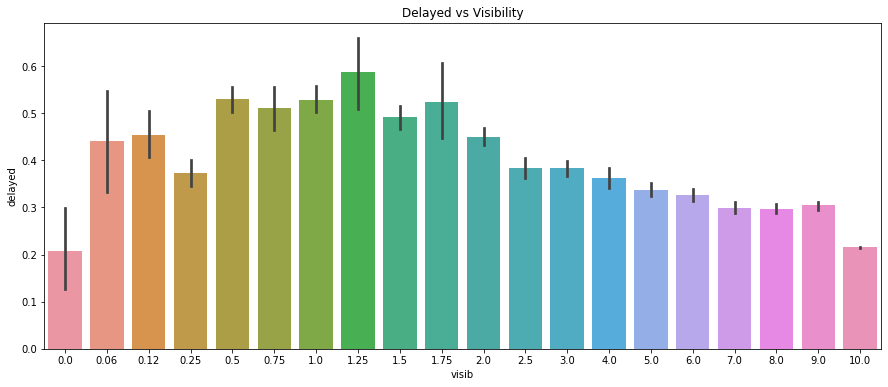

In [19]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Visibility")
sns.barplot(data['visib'],data['delayed'])
plt.show()

#Unsurprisingly, flights that go through airspace with low visibility are delayed at a greater rate, on average

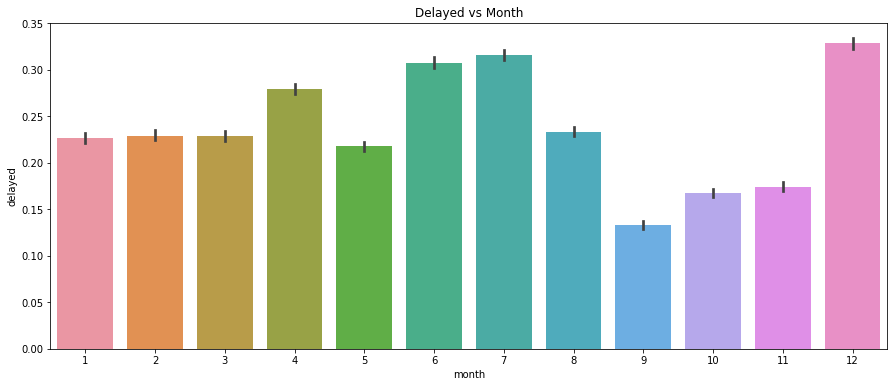

In [20]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Month")
sns.barplot(data['month'],data['delayed'])
plt.show()

#Flights in the most popular months (summer period and Christmas) are delayed at a greater rate, on average

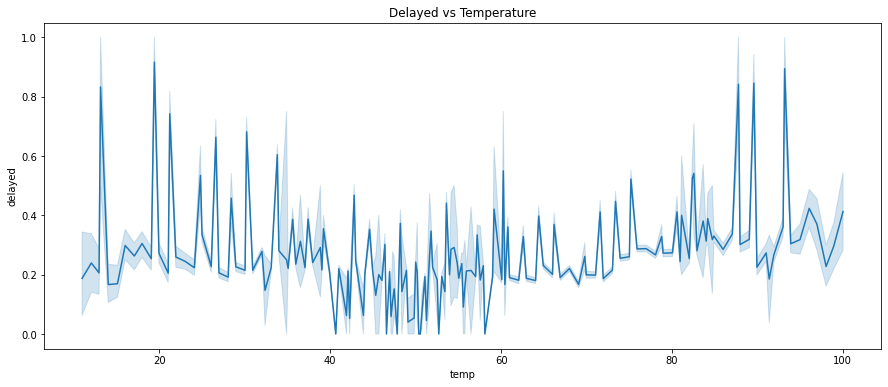

In [21]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Temperature")
sns.lineplot(data['temp'],data['delayed'])
plt.show()

#Delays tend to occur when temperatures are extreme

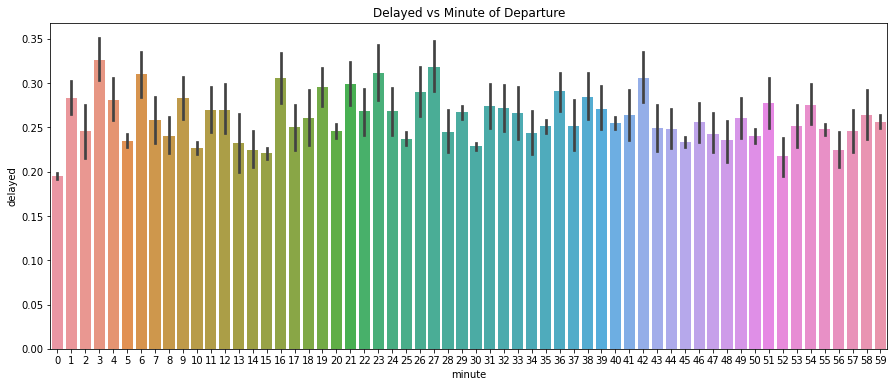

In [22]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Minute of Departure")
sns.barplot(data['minute'],data['delayed'])
plt.show()

#There is no clear relationship between delays and and the minute of departure

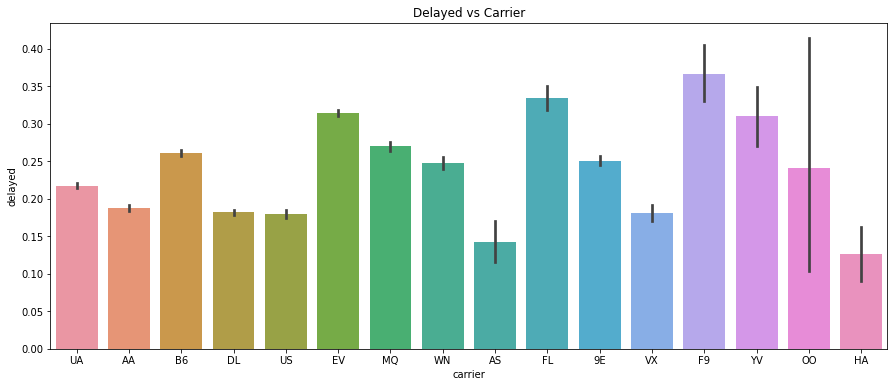

In [23]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Carrier")
sns.barplot(data['carrier'],data['delayed'])
plt.show()

#Flights with ExpressJet Airlines, AirTran Airlines, Frontier Airlines, and Mesa Airlines 
#are delayed at a greater rate, on average

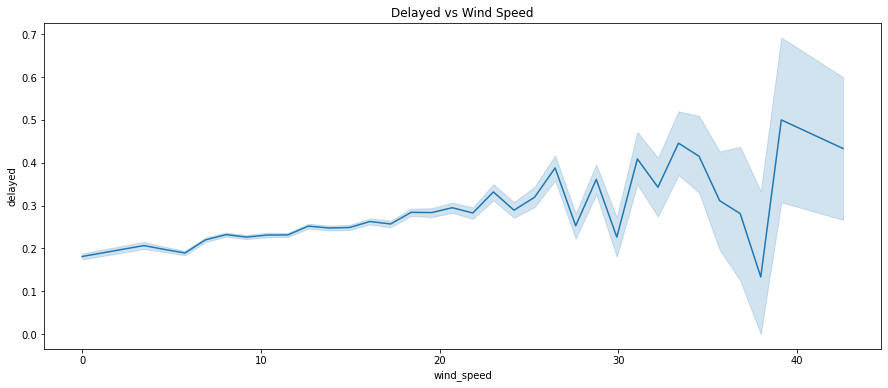

In [24]:
plt.figure(figsize=(15,6))
plt.title("Delayed vs Wind Speed")
sns.lineplot(data['wind_speed'],data['delayed'])
plt.show()

#Flights that go through airspace with high wind speeds are delayed at a greater rate, on average

# 3. Prediction

### Filtering Out Unused Columns

In [25]:
#Specifiying the columns to drop from the data
to_drop = ['year','carrier','flight','origin','dest','time_hour','name']
data_cols = list(data.columns)

for col in to_drop:
    data_cols.remove(col)
    
#Dropping the columns specified above from the data
data = data[[i for i in data_cols]]

### **Class Balance Inspection**

In [26]:
#Here I inspect the balance between the two classes in the data. 
not_delayed = data['delayed'].value_counts()[0]
delayed = data['delayed'].value_counts()[1]

delayed_share = (delayed/data.shape[0])*100
not_delayed_share = (not_delayed/data.shape[0])*100

class_shares = {'Delayed':delayed_share,'Not delayed':not_delayed_share}

for share in class_shares:
    print(share + ": " + "{:.2f}".format(class_shares[share]) + "%")
    
#We observe a greater share of flight that are not delayed than those that are delayed. 
#This class imbalance is therefore something we must be aware of - it may impact
#the performance of our predictive model.

Delayed: 23.68%
Not delayed: 76.32%


In [27]:
#Undersampling to combat imbalance#
#Here I increase the representation of delayed flights by selecting
#a smaller number of not delayed flights to be included in the dataset.
#This increases the class balance as we can see below.
not_delayed_data = data[data['delayed']==0].sample(data[data['delayed']==1].shape[0])
delayed_data = data[data['delayed']==1]
data_final = delayed_data.append(not_delayed_data)

In [28]:
data_final.shape
#The dataframe containg the final input features 150,490 observations and 20 columns

(150490, 20)

In [29]:
not_delayed = data_final['delayed'].value_counts()[0]
delayed = data_final['delayed'].value_counts()[1]

delayed_share = (delayed/data_final.shape[0])*100
not_delayed_share = (not_delayed/data_final.shape[0])*100

class_shares = {'Delayed':delayed_share,'Not delayed':not_delayed_share}

for share in class_shares:
    print(share + ": " + "{:.2f}".format(class_shares[share]) + "%")
    
print('')
print('Not Delayed (0) vs Delayed (1) Counts')
print(data_final['delayed'].value_counts())

#After undersampling, we now have an even split of classes

Delayed: 50.00%
Not delayed: 50.00%

Not Delayed (0) vs Delayed (1) Counts
0    75245
1    75245
Name: delayed, dtype: int64


In [30]:
#Splitting into X and y data#
#The X data contains only the input features
X = data_final.iloc[:,1:len(data_final.columns)-1]

#The y data contains the output features or labels
y = data_final['delayed']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Here, the data is split into train and test data (75%/25% split)

### Building the Logistic Classifier

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_train)

misclassifications = sum((y_train - pred)**2)
total_predictions = len(pred)
total_predictions
accuracy = 100 - ((misclassifications/total_predictions) * 100)

print("Training Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy: 99.67% (2dp)


In [33]:
pred = model.predict(X_test)

misclassifications = sum((y_test - pred)**2)
total_predictions = len(pred)
total_predictions
accuracy = 100 - ((misclassifications/total_predictions) * 100)

print("Test Accuracy: " + "{:.2f}".format(accuracy) + "% (2dp)")

#We observe a test accuracy of 99.6%

Test Accuracy: 99.64% (2dp)


### Evaluating the Model

In [34]:
#Confusion matrix#
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

#The confusion matrix shows us how many correct and incorrect
#classifications we have made. The correct classifications 
#(true positive, true negative) lie along the diagonal, whilst
#the incorrect classifications (false positive, false negative) lie along the off-diagonal

[[18745    50]
 [   87 18741]]


In [35]:
from sklearn.metrics import recall_score
print("Recall: " + "{:.2f}".format(recall_score(pred,y_test)*100) + "% (2dp)")

#Recall indicates the ability of the classifier to find all the positive samples.
#A recall score that is close to 1 is optimal.

Recall: 99.54% (2dp)


# 4. Recommendations

In [36]:
#Function to determine the p-values for each coefficient#
#Sklearn does not natively support this functionality
#Reference:
#https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance

from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [37]:
#Creating the list of input features to display the coefficients and statistical significance for
features = list(data.columns)
features.remove('delayed') #We remove 'delayed' as this is our output feature/label

In [38]:
from sklearn.linear_model import LogisticRegression

#Building and fitting the logistic regression model
model = LogisticRegression()
model.fit(X,y)
model.coef_

p_vals = list(logit_pvalue(model,X))

coefficients = {}

print("Coefficients and Statistical Significance:")
print("")

for i in range(len(features)):
    coefficients[features[i]] = ["Coefficient",model.coef_[0][i],"p-value: ",p_vals[i]]
    if 0.01 <= coefficients[features[i]][3] < 0.05: #Statistically significant at 5%
        print(features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" *")
    elif 0.005 < coefficients[features[i]][3] < 0.01: #Statistically significant at 1%
        print(features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" **")
    elif coefficients[features[i]][3] <= 0.005: #Statistically significant at 0.5%
        print(features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i])+" ***")
    else:
        print(features[i] + " - Coefficient: " + "{:.2f}".format(coefficients[features[i]][1]) 
              + ", p-value: " + "{:.3f}".format(p_vals[i]))
        
        
#I am unsure as to why the model fails to include the final feature 'visib' thus raising this error

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients and Statistical Significance:

month - Coefficient: -0.02, p-value: 0.948
day - Coefficient: -0.00, p-value: 0.002 ***
dep_time - Coefficient: 0.00, p-value: 0.210
sched_dep_time - Coefficient: 0.00, p-value: 0.393
dep_delay - Coefficient: -0.00, p-value: 0.779
arr_time - Coefficient: 0.00, p-value: 0.071
sched_arr_time - Coefficient: 2.17, p-value: 0.878
arr_delay - Coefficient: -0.01, p-value: 0.000 ***
air_time - Coefficient: 0.00, p-value: 0.000 ***
distance - Coefficient: 0.07, p-value: 0.000 ***
dep_hour - Coefficient: -0.00, p-value: 0.716
minute - Coefficient: -0.58, p-value: 0.972
temp - Coefficient: 0.62, p-value: 0.000 ***
dewp - Coefficient: -0.32, p-value: 0.000 ***
humid - Coefficient: -0.00, p-value: 0.000 ***
wind_dir - Coefficient: -0.00, p-value: 0.167
wind_speed - Coefficient: 0.00, p-value: 0.761
precip - Coefficient: -0.52, p-value: 0.998


IndexError: index 18 is out of bounds for axis 0 with size 18

In [ ]:
import math

coefficients_odds = coefficients

for i in coefficients_odds:
    coefficients_odds[i][1] =  math.exp(coefficients[i][1])
    #We take the exponential of the log odds above to find the odds multiplier
    #as this is easier to interpret
    print(i + " odds multiplier: " + "{:.2f}".format(coefficients_odds[i][1]))

### Interpretations & Recommendations

Here, I consider the 3 features that are both statistically significant and have a substantial odds multiplier

***Feature (Odds multiple, Significance Level)***

***Temperature (1.53, 0.5%)***

* Interpretation: As the temperature increases by 1 degree, the odds of delay increase by 53%
* This is because, as temperature increases, the lower the air density and therefore the lower the lift. Delays may therefore be likely to occur as planes end up flying slower in hot conditions. (https://theconversation.com/how-hot-weather-and-climate-change-affect-airline-flights-80795#:~:text=High%20air%20temperatures%20affect%20the,the%20density%20of%20the%20air.)
* Recommendation: Plan to use routes that have conditions that would be conducive to the flight of the plane (where possible). Take actions to reduce plane temperature whilst in flight.

***Dew Point (0.80, 0.5%)***

* Interpretation: As the dew point increases by 1 unit, the odds of delay decrease by 20%
* Higher dew points mean that not much cooling is needed to create fog or clouds. This can reduce visibility thus causing delays
* Recommendation: Plan to use routes where dew points are likely to be lower, although the dew point also needs to be considered in relation to the temperature since "If the dewpoint is the same or higher than the current temperature, then dew (or fog) will occur." (https://www.sunnysports.com/blog/relationship-temperature-humidity-dewpoint/)

***Distance (1.03, 5%)***

* Interpretation: As the distance increases by 1 unit, the odds of delay increase by 3%
* Recommendation: For regional airlines, this is unlikely to be a problem as most offerings will be short-haul. In the case of international airlines, offering connecting flights in the case of long-haul flights will help to reduce the chances of a delay.


# 5. Future Analysis Extensions

* Consider type of airline (regional vs international) - do delays depend on the business model employed?
* Consider origin and dest - are delays more common for certain airports? Is this due to certain characteristics of the airport itself, the weather in that location, or do only certain (poorly organised) airlines fly there?
* Consider carrier - are delays more common for certain airlines? Why? This would help the client from a competitive standpoint as well
* Create arr_hour column - are some hours of arrival more popular than others, making delays more likely as pilots wait longer for a landing slot?
* Consider the presence of collinearity in the Logistic Regression - how is this impacting our results?